# Introducing:

## Source:
https://www.kaggle.com/datasets/uciml/german-credit?datasetId=531&sortBy=dateRun&tab=bookmarked

## Context:
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

## Content:

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- default (1 - bad, 0 - good)


## Task:
To understand incentives to default

## Used libraries:
- pandas
- numpy
- matplotlib
- phik

In [1]:
import pandas as pd
import numpy as np
import phik

import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Data preparation

## Read data

In [3]:
pd.read_csv('/home/antonius/Projects/DS_Projects/Data-analysis-python-pandas/1_german-credit/data/german-credit.csv')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,996,40,male,3,own,little,little,3857,30,car,0
997,997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,998,23,male,2,free,little,little,1845,45,radio/TV,1


## Format data

In [4]:
df = pd.read_csv('/home/antonius/Projects/DS_Projects/Data-analysis-python-pandas/1_german-credit/data/german-credit.csv')
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0


In [5]:
len(df)

1000

### Delete no needed columns

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


### Rename columns

In [8]:
df.columns.str.lower().str.replace(' ', '_')

Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'default'],
      dtype='object')

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


## Rename rows

0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

In [11]:
job_dict = {0:"unskilled and non-resident",
            1:"unskilled and resident",
            2:"skilled",
            3: "highly skilled"}

In [12]:
df['job'].map(job_dict)

0                     skilled
1                     skilled
2      unskilled and resident
3                     skilled
4                     skilled
                ...          
995    unskilled and resident
996            highly skilled
997                   skilled
998                   skilled
999                   skilled
Name: job, Length: 1000, dtype: object

In [13]:
df['job'] = df['job'].map(job_dict)

In [14]:
df

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,0
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,0
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0
4,53,male,skilled,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled and resident,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,highly skilled,own,little,little,3857,30,car,0
997,38,male,skilled,own,little,NaN,804,12,radio/TV,0
998,23,male,skilled,free,little,little,1845,45,radio/TV,1


### Skips, Nans

In [15]:
df.isna().mean().sort_values(ascending=False).reset_index()

,index,0
0,checking_account,0.394
1,saving_accounts,0.183
2,age,0.000
3,sex,0.000
4,job,0.000
5,housing,0.000
6,credit_amount,0.000
7,duration,0.000
8,purpose,0.000
9,default,0.000


In [16]:
df['saving_accounts'].fillna('no_info', inplace=True)

In [17]:
df['checking_account'].fillna('no_info', inplace=True)

In [18]:
df

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1
2,49,male,unskilled and resident,own,little,no_info,2096,12,education,0
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0
4,53,male,skilled,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled and resident,own,little,no_info,1736,12,furniture/equipment,0
996,40,male,highly skilled,own,little,little,3857,30,car,0
997,38,male,skilled,own,little,no_info,804,12,radio/TV,0
998,23,male,skilled,free,little,little,1845,45,radio/TV,1


In [19]:
df.isna().mean()

age                 0.0
sex                 0.0
job                 0.0
housing             0.0
saving_accounts     0.0
checking_account    0.0
credit_amount       0.0
duration            0.0
purpose             0.0
default             0.0
dtype: float64

# Phik

In [20]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['age', 'credit_amount', 'duration', 'default']


In [21]:
phik_overview['default'].sort_values(ascending=False).reset_index()

,index,default
0,default,1.000000
1,checking_account,0.512074
2,duration,0.285273
3,credit_amount,0.240898
4,age,0.147761
5,saving_accounts,0.146780
6,purpose,0.108971
7,sex,0.103450
8,housing,0.076848
9,job,0.000000


In [22]:
(phik_overview['default'].sort_values(ascending=False).reset_index()
.style
.highlight_between(left=.3, right=1, subset='default', color='red' )
.highlight_between(left=.1, right=.3, subset='default', color='orange' )
.highlight_between(left=0, right=.1, subset='default', color='green' )

.format({
    'default': '{:,.2%}'.format,
})
)

,index,default
0,default,100.00%
1,checking_account,51.21%
2,duration,28.53%
3,credit_amount,24.09%
4,age,14.78%
5,saving_accounts,14.68%
6,purpose,10.90%
7,sex,10.35%
8,housing,7.68%
9,job,0.00%


# Analysis

## checking_account Analysis

In [23]:
df.groupby('checking_account')['default'].agg(['count', 'mean',])

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


In [24]:
df.groupby(['checking_account', 'sex'])['default'].agg(['count', 'mean'])

count      mean
checking_account sex                    
little           female     88  0.522727
                 male      186  0.478495
moderate         female     86  0.476744
                 male      183  0.349727
no_info          female    116  0.155172
                 male      278  0.100719
rich             female     20  0.200000
                 male       43  0.232558

In [25]:
df.groupby(['checking_account', 'job'])['default'].agg(['count', 'mean'])

count      mean
checking_account job                                        
little           highly skilled                 37  0.324324
                 skilled                       172  0.558140
                 unskilled and non-resident      6  0.666667
                 unskilled and resident         59  0.389831
moderate         highly skilled                 48  0.562500
                 skilled                       155  0.367742
                 unskilled and non-resident      9  0.222222
                 unskilled and resident         57  0.333333
no_info          highly skilled                 55  0.181818
                 skilled                       266  0.101504
                 unskilled and non-resident      3  0.000000
                 unskilled and resident         70  0.128571
rich             highly skilled                  8  0.250000
                 skilled                        37  0.162162
                 unskilled and non-resident      4  0.250000
                 unskilled and resident         14  0.357143

In [26]:
(df.groupby(['checking_account', 'job'])['default']
.agg(['count', 'mean'])
.style
.highlight_between(left=.3, right=1, subset='mean', color='red' )
.highlight_between(left=.2, right=.3, subset='mean', color='orange' )
.highlight_between(left=.1, right=.2, subset='mean', color='green' )
 
.highlight_between(left=150, right=1000, subset='count', color='blue' )


.format({
    'mean': '{:,.2%}'.format,
    'count': '{}'.format,
})
)

- pay attention to highly skilled, skilled in checking_account(little, moderate)


In [27]:
df['duration_group'] = pd.qcut(df['duration'],5)

In [28]:
df.groupby(['checking_account', 'duration_group'])['default'].agg(['count', 'mean'])

count      mean
checking_account duration_group                 
little           (3.999, 12.0]      92  0.358696
                 (12.0, 15.0]       16  0.250000
                 (15.0, 24.0]      102  0.549020
                 (24.0, 30.0]       15  0.400000
                 (30.0, 72.0]       49  0.734694
moderate         (3.999, 12.0]      91  0.296703
                 (12.0, 15.0]       16  0.375000
                 (15.0, 24.0]       82  0.341463
                 (24.0, 30.0]       20  0.500000
                 (30.0, 72.0]       60  0.566667
no_info          (3.999, 12.0]     146  0.075342
                 (12.0, 15.0]       34  0.029412
                 (15.0, 24.0]      137  0.145985
                 (24.0, 30.0]       19  0.105263
                 (30.0, 72.0]       58  0.206897
rich             (3.999, 12.0]      30  0.166667
                 (12.0, 15.0]        6  0.333333
                 (15.0, 24.0]       18  0.277778
                 (24.0, 30.0]        3  0.333333
                 (30.0, 72.0]        6  0.166667

In [29]:
(df.groupby(['checking_account', 'duration_group'])['default']
.agg(['count', 'mean'])
.style
.highlight_between(left=.3, right=1, subset='mean', color='red' )
.highlight_between(left=.15, right=.3, subset='mean', color='orange' )
.highlight_between(left=0, right=.15, subset='mean', color='green' )
 
.highlight_between(left=100, right=1000, subset='count', color='blue' )


.format({
    'mean': '{:,.2%}'.format,
    'count': '{}'.format,

})
)

- Pay attention to duration_group from 15-72 in checking_account(little, moderate)

## Age Analysis

In [30]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,duration_group
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0,"(3.999, 12.0]"
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1,"(30.0, 72.0]"
2,49,male,unskilled and resident,own,little,no_info,2096,12,education,0,"(3.999, 12.0]"
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0,"(30.0, 72.0]"
4,53,male,skilled,free,little,little,4870,24,car,1,"(15.0, 24.0]"


In [31]:
df['age_group'] = pd.qcut(df['age'],3)

In [32]:
df.groupby('age_group')['default'].agg(['count', 'mean',])

,count,mean
age_group,,
"(18.999, 28.0]",334,0.365269
"(28.0, 38.0]",346,0.271676
"(38.0, 75.0]",320,0.262500


In [33]:
(df.groupby(['age_group'])['default']
.agg(['count', 'mean'])
.style
.highlight_between(left=.3, right=.4, subset='mean', color='red' )
.highlight_between(left=.2, right=.3, subset='mean', color='orange' )

.format({
    'mean': '{:,.2%}'.format,
})
)

,count,mean
age_group,,
"(18.999, 28.0]",334,36.53%
"(28.0, 38.0]",346,27.17%
"(38.0, 75.0]",320,26.25%


<AxesSubplot: xlabel='age_group'>

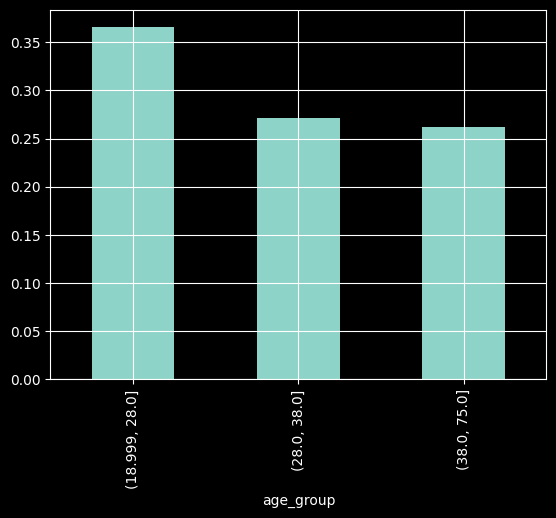

In [34]:
df.groupby('age_group')['default'].mean().plot(ylim=0, grid=True,kind='bar')

*As we can see default is much more common in age group from 18-29*

## Gender Analysis

In [35]:
df.groupby('sex')['default'].agg(['count', 'mean'])

,count,mean
sex,,
female,310,0.351613
male,690,0.276812


In [36]:
(df.groupby('sex')['default']
.agg(['count', 'mean'])
.style

.highlight_between(left=500, right=1000, subset='count', color='blue' )

.format({
    'count': '{}'.format,
    'mean': '{:,.2%}'.format,

})
)

,count,mean
sex,,
female,310,35.16%
male,690,27.68%


- Twice as many men as women.
- Among women, the default rate is higher.

In [37]:
df.groupby('sex')['age'].agg(['count', 'mean', 'median'])

,count,mean,median
sex,,,
female,310,32.803226,29.0
male,690,36.778261,35.0


*Women in this dataset are younger*

## Age group and Gender Analysis

In [38]:
df.groupby(['age_group', 'sex'])['default'].agg(['count', 'mean'])

count      mean
age_group      sex                    
(18.999, 28.0] female    154  0.409091
               male      180  0.327778
(28.0, 38.0]   female     83  0.385542
               male      263  0.235741
(38.0, 75.0]   female     73  0.191781
               male      247  0.283401

In [39]:
(df.groupby(['age_group', 'sex'])['default']
.agg(['count', 'mean'])
.style
.highlight_between(left=.3, right=.5, subset='mean', color='red' )
.highlight_between(left=.2, right=.3, subset='mean', color='orange' )
.highlight_between(left=.1, right=.2, subset='mean', color='green' )
 
.highlight_between(left=200, right=1000, subset='count', color='blue' )


.format({
    'mean': '{:,.2%}'.format,
})
)

age group 18-28:
- The number of women and men is equal in the dataset. Slightly more men.
- The default rate is high for both genders. But in women it is still more.

age group 28-38:
- Three times more men as women. 
- The default rate for men decreased, while the default rate for women remained at the same level.

age group 38+ : 
- Still three times more men as women.
- The default rate among women fell sharply by half
- The default rate for men has risen slightly with age 

## Job Analysis

In [40]:
df.groupby([ 'job'])['default'].agg(['count', 'mean'])

,count,mean
job,,
highly skilled,148,0.344595
skilled,630,0.295238
unskilled and non-resident,22,0.318182
unskilled and resident,200,0.280000


- Highly skilled highest default rate
- The most number of credits was taken skilled

In [41]:
df.groupby(['job', 'age_group'])['default'].agg(['count', 'mean'])

count      mean
job                        age_group                      
highly skilled             (18.999, 28.0]     21  0.523810
                           (28.0, 38.0]       68  0.220588
                           (38.0, 75.0]       59  0.423729
skilled                    (18.999, 28.0]    240  0.350000
                           (28.0, 38.0]      220  0.268182
                           (38.0, 75.0]      170  0.252941
unskilled and non-resident (18.999, 28.0]      9  0.555556
                           (28.0, 38.0]        4  0.250000
                           (38.0, 75.0]        9  0.111111
unskilled and resident     (18.999, 28.0]     64  0.343750
                           (28.0, 38.0]       54  0.351852
                           (38.0, 75.0]       82  0.182927

In [42]:
df.groupby('job')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
job,,,
highly skilled,148,5435.493243,4459.0
skilled,630,3070.965079,2324.0
unskilled and non-resident,22,2745.136364,1416.0
unskilled and resident,200,2358.520000,1622.0


*As we can see the main influence is exerted by the size of the loan. In highly skilled and skilled, the loan amount is higher than in unskilled.*

## Сredit amount Analysis

In [43]:
df['credit_amount_group'] = pd.qcut(df['credit_amount'],5)

In [44]:
df.groupby('credit_amount_group')['default'].agg(['count','mean'])

,count,mean
credit_amount_group,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


*The larger the loan, the higher the default rate.*

## Real estate property Analysis

In [45]:
(df.groupby('housing')['default']
.agg(['count','mean'])
.style

.highlight_between(left=0.3, right=1, subset='mean', color='orange' )
.highlight_between(left=0, right=0.3, subset='mean', color='green' )
.highlight_between(left=500, right=1000, subset='count', color='blue' )
.format({
    'count': '{}'.format,
    'mean': '{:,.2%}'.format,
}))

,count,mean
housing,,
free,108,40.74%
own,713,26.09%
rent,179,39.11%


*If the house is owned, then the default is much lower.*

## Purpose Analysis 

In [46]:
df.groupby('purpose')['default'].agg(['count','mean'])

,count,mean
purpose,,
business,97,0.350515
car,337,0.314540
domestic appliances,12,0.333333
education,59,0.389831
furniture/equipment,181,0.320442
radio/TV,280,0.221429
repairs,22,0.363636
vacation/others,12,0.416667


In [47]:
df.groupby(['purpose', 'age_group'])['default'].agg(['count', 'mean'])

count      mean
purpose             age_group                      
business            (18.999, 28.0]     34  0.294118
                    (28.0, 38.0]       38  0.315789
                    (38.0, 75.0]       25  0.480000
car                 (18.999, 28.0]     90  0.466667
                    (28.0, 38.0]      123  0.252033
                    (38.0, 75.0]      124  0.266129
domestic appliances (18.999, 28.0]      6  0.333333
                    (28.0, 38.0]        3  0.000000
                    (38.0, 75.0]        3  0.666667
education           (18.999, 28.0]     13  0.538462
                    (28.0, 38.0]       20  0.400000
                    (38.0, 75.0]       26  0.307692
furniture/equipment (18.999, 28.0]     78  0.346154
                    (28.0, 38.0]       57  0.298246
                    (38.0, 75.0]       46  0.304348
radio/TV            (18.999, 28.0]    104  0.307692
                    (28.0, 38.0]       96  0.218750
                    (38.0, 75.0]       80  0.112500
repairs             (18.999, 28.0]      8  0.250000
                    (28.0, 38.0]        5  0.600000
                    (38.0, 75.0]        9  0.333333
vacation/others     (18.999, 28.0]      1  0.000000
                    (28.0, 38.0]        4  0.500000
                    (38.0, 75.0]        7  0.428571

In [48]:
df.groupby(['purpose', 'job'])['default'].agg(['count', 'mean'])

count      mean
purpose             job                                        
business            highly skilled                 15  0.466667
                    skilled                        60  0.350000
                    unskilled and non-resident      2  0.500000
                    unskilled and resident         20  0.250000
car                 highly skilled                 69  0.289855
                    skilled                       190  0.321053
                    unskilled and non-resident     12  0.250000
                    unskilled and resident         66  0.333333
domestic appliances skilled                        10  0.300000
                    unskilled and non-resident      1  0.000000
                    unskilled and resident          1  1.000000
education           highly skilled                  8  0.500000
                    skilled                        35  0.428571
                    unskilled and non-resident      1  1.000000
                    unskilled and resident         15  0.200000
furniture/equipment highly skilled                 21  0.428571
                    skilled                       126  0.301587
                    unskilled and non-resident      1  1.000000
                    unskilled and resident         33  0.303030
radio/TV            highly skilled                 26  0.230769
                    skilled                       195  0.220513
                    unskilled and non-resident      2  0.000000
                    unskilled and resident         57  0.228070
repairs             skilled                        13  0.384615
                    unskilled and non-resident      2  0.500000
                    unskilled and resident          7  0.285714
vacation/others     highly skilled                  9  0.555556
                    skilled                         1  0.000000
                    unskilled and non-resident      1  0.000000
                    unskilled and resident          1  0.000000

In [49]:
(df.groupby(['purpose', 'job'])['default']
.agg(['count', 'mean'])
.style
.highlight_between(left=.3, right=100, subset='mean', color='red' )
.highlight_between(left=.2, right=.3, subset='mean', color='orange' )
.highlight_between(left=0, right=.2, subset='mean', color='green' )

.highlight_between(left=100, right=1000, subset='count', color='blue' )

.format({
    'mean': '{:,.2%}'.format,
    'count': '{}'.format,

})
)

## Duration Analysis

In [50]:
df['duration_group'] = pd.qcut(df['duration'],5)

In [51]:
df.groupby('duration_group')['default'].agg(['count', 'mean',])

,count,mean
duration_group,,
"(3.999, 12.0]",359,0.211699
"(12.0, 15.0]",72,0.180556
"(15.0, 24.0]",339,0.321534
"(24.0, 30.0]",57,0.333333
"(30.0, 72.0]",173,0.479769


In [129]:
(df.groupby(['duration_group'])['default']
.agg(['count', 'mean'])
.style
.highlight_between(left=.3, right=100, subset='mean', color='red' )
.highlight_between(left=.2, right=.3, subset='mean', color='orange' )
.highlight_between(left=0, right=.2, subset='mean', color='green' )
 
.highlight_between(left=150, right=1000, subset='count', color='blue' )

.format({
    'mean': '{:,.2%}'.format,
    'count': '{}'.format,

})
)

,count,mean
duration_group,,
"(3.999, 12.0]",359,21.17%
"(12.0, 15.0]",72,18.06%
"(15.0, 24.0]",339,32.15%
"(24.0, 30.0]",57,33.33%
"(30.0, 72.0]",173,47.98%


<AxesSubplot: xlabel='duration_group'>

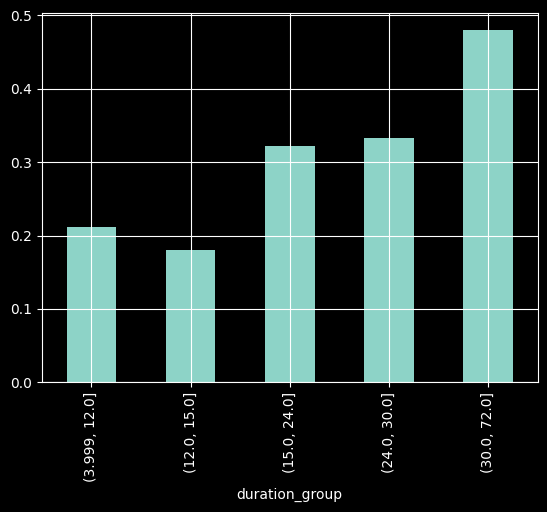

In [130]:
df.groupby('duration_group')['default'].mean().plot(ylim=0, grid=True,kind='bar')

*The longer the loan duration, the higher the default rating*

# Conclusion: